In [2]:
#Import modules
%matplotlib inline

#handling data
import pandas as pd
import numpy as np
from scipy import stats
from operator import itemgetter

#handling information
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

In [3]:
tweets_df = pd.read_csv("df_for_network_plot.csv")
tweets_df.head()

,Unnamed: 0,username,party,mentioned_user,mentioned_party,Label
0,0,stbrandner,AfD,karl_lauterbach,SPD,NOT
1,1,stbrandner,AfD,karl_lauterbach,SPD,NOT
2,2,stbrandner,AfD,rene_springer,AfD,NOT
3,3,stbrandner,AfD,rene_springer,AfD,NOT
4,4,stbrandner,AfD,mastrackzi,FDP,NOT


In [4]:
len(tweets_df)

66090

In [5]:
hof = tweets_df[tweets_df["Label"] == "HOF"]
len(hof)

1783

In [6]:
spread = pd.DataFrame(hof.username.value_counts())
receive = pd.DataFrame(hof.mentioned_user.value_counts())

spread = spread.reset_index()
receive = receive.reset_index()

merge = spread.merge(receive, left_on='index', right_on='index',suffixes=['', '_'])
#merge = merge.rename(columns = {"full_name": "hof_mentions", "full_name_": "not_mentions"})
#merge.drop(["level_0", "level_0_"], axis=1)
merge

,index,username,mentioned_user
0,matthiashauer,73,10
1,derya_tn,67,5
2,renatekuenast,36,9
3,ralf_stegner,35,73
4,mgrossebroemer,33,12
...,...,...,...
169,katrinhelling,1,1
170,gydej,1,2
171,martingassner,1,2
172,daniludwigmdb,1,3


In [7]:
merge.set_index('index', inplace=True)
merge

,username,mentioned_user
index,,
matthiashauer,73,10
derya_tn,67,5
renatekuenast,36,9
ralf_stegner,35,73
mgrossebroemer,33,12
...,...,...
katrinhelling,1,1
gydej,1,2
martingassner,1,2


In [8]:
spread.set_index('index', inplace=True)
receive.set_index('index', inplace=True)

In [9]:
receive.head(2)

,mentioned_user
index,
olafscholz,182
karl_lauterbach,117


In [10]:
spread.head(2)

,username
index,
m_reichardt_afd,263
matthiashauer,73


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


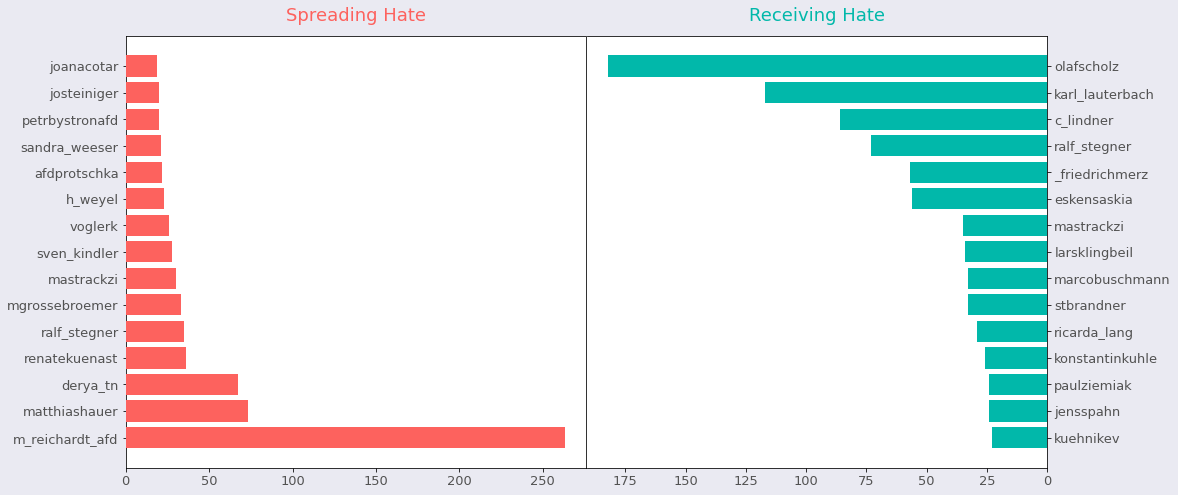

In [11]:
#merges = merge[:30]
receive = receive[:15]
spread = spread[:15]

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = spread.index
index1 = receive.index
column0 = spread['username']
column1 = receive['mentioned_user']
title0 = 'Spreading Hate'
title1 = 'Receiving Hate'

fig, axes = plt.subplots(figsize=(20,8), facecolor=facecolor, ncols=2)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index1, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[1].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=spread.index, yticklabels=spread.index)
axes[0].yaxis.tick_left()
axes[1].set(yticks=receive.index, yticklabels=receive.index)
axes[1].yaxis.tick_right()
axes[0].tick_params(axis='y', colors='black') # tick color
axes[1].tick_params(axis='y', colors='black') # tick color

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.82)

filename = 'politicians_spread_vs_receive_hate'
plt.savefig(filename+'.png', facecolor=facecolor)

In [ ]:
hof.mentioned_user.value_counts()

# Wer verbreitet Hate?

In [12]:
von_afd = hof[hof["party"] == " AfD"]
von_spd = hof[hof["party"] == " SPD"]
von_csu = hof[hof["party"] == " CDU/CSU"]
von_linke = hof[hof["party"] == " Die Linke"]
von_grüne = hof[hof["party"] == " Bündnis 90/Die Grünen"]
von_fdp = hof[hof["party"] == " FDP"]
von_afd.mentioned_party.value_counts()

 SPD                      199
 Bündnis 90/Die Grünen     61
 AfD                       58
 FDP                       48
 CDU/CSU                   38
 Die Linke                 24
 fraktionslos               1
Name: mentioned_party, dtype: int64

In [13]:
print(f"AfD: {len(von_afd)}")
print(f"SPD: {len(von_spd)}")
print(f"CSU/CDU: {len(von_csu)}")
print(f"Die Linke: {len(von_linke)}")
print(f"Die Grünen: {len(von_grüne)}")
print(f"FDP: {len(von_fdp)}")
# meister Hate geht von AfD und SPD aus

AfD: 429
SPD: 402
CSU/CDU: 282
Die Linke: 71
Die Grünen: 306
FDP: 271


In [14]:
# Jetzt Prozentual
print(f"AfD: {len(von_afd)/1783}%")
print(f"SPD: {len(von_spd)/1783}%")
print(f"CSU/CDU: {len(von_csu)/1783}%")
print(f"Die Linke: {len(von_linke)/1783}%")
print(f"Die Grünen: {len(von_grüne)/1783}%")
print(f"FDP: {len(von_fdp)/1783}%")
# meister Hate geht von AfD und SPD aus

AfD: 0.2406057206954571%
SPD: 0.22546270330902973%
CSU/CDU: 0.15816040381379698%
Die Linke: 0.039820527201346045%
Die Grünen: 0.17162086371284352%
FDP: 0.1519910263600673%


In [15]:
von_spd.mentioned_party.value_counts()

 SPD                      258
 CDU/CSU                   65
 FDP                       33
 Bündnis 90/Die Grünen     22
 AfD                       16
 Die Linke                  8
Name: mentioned_party, dtype: int64

In [16]:
von_csu.mentioned_party.value_counts()

 SPD                      102
 CDU/CSU                   84
 FDP                       37
 Bündnis 90/Die Grünen     34
 Die Linke                 14
 AfD                       10
 fraktionslos               1
Name: mentioned_party, dtype: int64

In [17]:
von_linke.mentioned_party.value_counts()

 Die Linke                27
 SPD                      20
 FDP                      10
 Bündnis 90/Die Grünen     9
 CDU/CSU                   5
Name: mentioned_party, dtype: int64

In [18]:
von_grüne.mentioned_party.value_counts()

 Bündnis 90/Die Grünen    141
 CDU/CSU                   59
 SPD                       58
 FDP                       35
 AfD                        6
 Die Linke                  6
 fraktionslos               1
Name: mentioned_party, dtype: int64

In [19]:
von_fdp.mentioned_party.value_counts()

 FDP                      164
 SPD                       47
 CDU/CSU                   31
 Bündnis 90/Die Grünen     21
 Die Linke                  5
 AfD                        2
 fraktionslos               1
Name: mentioned_party, dtype: int64

# Wer bekommt Hate ab?

In [20]:
von_afd = hof[hof["mentioned_party"] == " AfD"]
von_spd = hof[hof["mentioned_party"] == " SPD"]
von_csu = hof[hof["mentioned_party"] == " CDU/CSU"]
von_linke = hof[hof["mentioned_party"] == " Die Linke"]
von_grüne = hof[hof["mentioned_party"] == " Bündnis 90/Die Grünen"]
von_fdp = hof[hof["mentioned_party"] == " FDP"]
von_afd.party.value_counts()

 AfD                      58
 SPD                      16
 CDU/CSU                  10
 Bündnis 90/Die Grünen     6
 fraktionslos              5
 FDP                       2
Name: party, dtype: int64

In [21]:
print(f"AfD: {len(von_afd)}")
print(f"SPD: {len(von_spd)}")
print(f"CSU/CDU: {len(von_csu)}")
print(f"Die Linke: {len(von_linke)}")
print(f"Die Grünen: {len(von_grüne)}")
print(f"FDP: {len(von_fdp)}")
# meister Hate bekommt SPD ab, dann FDP, dann Grünen, dann CDU/CSU

AfD: 97
SPD: 690
CSU/CDU: 284
Die Linke: 84
Die Grünen: 290
FDP: 333


In [22]:
# Jetzt Prozentual
print(f"AfD: {len(von_afd)/1783}%")
print(f"SPD: {len(von_spd)/1783}%")
print(f"CSU/CDU: {len(von_csu)/1783}%")
print(f"Die Linke: {len(von_linke)/1783}%")
print(f"Die Grünen: {len(von_grüne)/1783}%")
print(f"FDP: {len(von_fdp)/1783}%")

AfD: 0.05440269209197981%
SPD: 0.3869882220975883%
CSU/CDU: 0.15928210880538418%
Die Linke: 0.04711160964666293%
Die Grünen: 0.16264722378014582%
FDP: 0.1867638810992709%


In [23]:
von_spd.party.value_counts()

 SPD                      258
 AfD                      199
 CDU/CSU                  102
 Bündnis 90/Die Grünen     58
 FDP                       47
 Die Linke                 20
 fraktionslos               6
Name: party, dtype: int64

In [24]:
von_afd.party.value_counts()

 AfD                      58
 SPD                      16
 CDU/CSU                  10
 Bündnis 90/Die Grünen     6
 fraktionslos              5
 FDP                       2
Name: party, dtype: int64